# Image compression with Clustering
# Color quantization

It's a way to quantize colours into k non-uniform buckets 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


Image shape: one position for each colour R G B (720, 1280, 3)


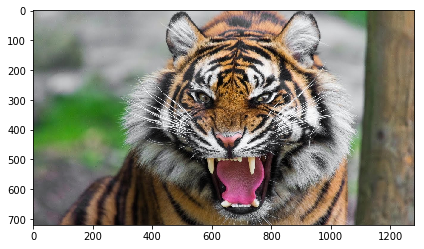

In [1]:
%matplotlib inline
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

image = io.imread('tiger.png')
io.imshow(image)
io.show

print("Image shape: one position for each colour R G B", image.shape)


## Clustering the colors with k-means
### Codification / compression

It is a compression process. There are 256 \* 256 \* 256 different possible colors, that is, almost 17 million colors, that will be compressed to just 128 (or the number we want).

We run k-means with 128 clusters. Each cluster will represent a different colour. 

The image will be coded with 128 colors or clusters. To label all the clusters we just need 7 bits (well ok, let us use a 8 bit word). 

In order to paint the picture again we'll need to replace each class label with the cluster center (the average of the colors belonging to the cluster). So we'll store the picture as matrix of pixels where each pixel is a cluster (color) label. And we'll also need the codebook, that is, the RGB color represented by each cluster.

In [2]:
rows = image.shape[0]
cols = image.shape[1]

image = image.reshape(image.shape[0]*image.shape[1],3)
kmeans = KMeans(n_clusters = 128, n_init=10, max_iter=200)
kmeans.fit(image)

clusters = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
labels = labels.reshape(rows,cols); 
    

In [3]:
np.save('codebook_tiger.npy',clusters)    
io.imsave('compressed_tiger.png',labels);


In [8]:
clusters[0]

array([164, 140, 130], dtype=uint8)

### Decodification / decompression

In [7]:
centers = np.load('codebook_tiger.npy')

c_image = io.imread('compressed_tiger.png')
c_image = c_image.reshape(rows, cols)

d_image = centers[c_image]
d_image = d_image.reshape(rows, cols, 3)


In [9]:
centers[0]

array([164, 140, 130], dtype=uint8)

In [11]:
d_image[0,0]

array([161, 164, 163], dtype=uint8)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


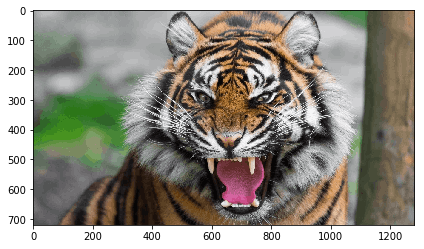

In [12]:
io.imsave('reconstructed_tiger.png',d_image);
io.imshow(d_image)
io.show()

In [21]:
cluster_info = np.bincount(c_image.reshape(c_image.shape[0]*c_image.shape[1]))

In [22]:
cluster_info

array([ 4276, 10491, 16438,  8188,  7962,  8645,  2802,  5912, 20713,
        6921,  4205,  4868,  4654,  1250,  3199,  7630,  4704, 12577,
        2638,  2612, 21646,  5150, 10250,  3191, 11013,  8883,  4785,
        2047,  9342, 14559,  7926,  3719, 19043,  4805,  9005,  2189,
        6330,  4160,  8755,  4818,  3785,  4836,  5083,  3315,  1096,
       11578,  9803,  7492,  2045,  3129, 14953,  8499,  4131, 26112,
       12795, 17421,  5973,  1751,  3263,  2455, 20078,  6273,  3490,
        1515,  5033, 10238,  4851, 19818,  9317,  8444,  3619,  9623,
        3443, 11657,  6833,  3529,  1805, 11244, 10016,  3146,  4324,
        3647,  3878, 11027,  6958,  4963,  4560,  7172,  2158,  9161,
        7876,  8562,  1308, 11890,  5060,  5342,  2112,  7627,  4638,
        3728,  6103,  4116, 14242,  4544,  5434,  6020,  2432,  3044,
        9731,  2441,  4883,  9932, 12964,  3272,  6535,  9131, 11971,
        2539,  7793, 10327,  7714,  4591,  4887, 13342,  4343, 10890,
        3079, 13521]

In [27]:
print("min: ", np.amin(cluster_info), "max: ", np.amax(cluster_info), "mean: ", np.mean(cluster_info), "std: ", np.std(cluster_info))

min:  1096 max:  26112 mean:  7200.0 std:  4771.1591178795325


In [31]:
unique, counts = np.unique(c_image.reshape(c_image.shape[0]*c_image.shape[1]), return_counts=True) 
cluster_info2 = dict(zip(unique, counts))

In [32]:
cluster_info2

{0: 4276,
 1: 10491,
 2: 16438,
 3: 8188,
 4: 7962,
 5: 8645,
 6: 2802,
 7: 5912,
 8: 20713,
 9: 6921,
 10: 4205,
 11: 4868,
 12: 4654,
 13: 1250,
 14: 3199,
 15: 7630,
 16: 4704,
 17: 12577,
 18: 2638,
 19: 2612,
 20: 21646,
 21: 5150,
 22: 10250,
 23: 3191,
 24: 11013,
 25: 8883,
 26: 4785,
 27: 2047,
 28: 9342,
 29: 14559,
 30: 7926,
 31: 3719,
 32: 19043,
 33: 4805,
 34: 9005,
 35: 2189,
 36: 6330,
 37: 4160,
 38: 8755,
 39: 4818,
 40: 3785,
 41: 4836,
 42: 5083,
 43: 3315,
 44: 1096,
 45: 11578,
 46: 9803,
 47: 7492,
 48: 2045,
 49: 3129,
 50: 14953,
 51: 8499,
 52: 4131,
 53: 26112,
 54: 12795,
 55: 17421,
 56: 5973,
 57: 1751,
 58: 3263,
 59: 2455,
 60: 20078,
 61: 6273,
 62: 3490,
 63: 1515,
 64: 5033,
 65: 10238,
 66: 4851,
 67: 19818,
 68: 9317,
 69: 8444,
 70: 3619,
 71: 9623,
 72: 3443,
 73: 11657,
 74: 6833,
 75: 3529,
 76: 1805,
 77: 11244,
 78: 10016,
 79: 3146,
 80: 4324,
 81: 3647,
 82: 3878,
 83: 11027,
 84: 6958,
 85: 4963,
 86: 4560,
 87: 7172,
 88: 2158,
 89: 9161,

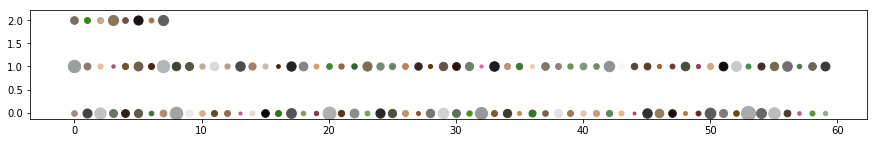

In [71]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(15,2)
for i in range (0,128):
    ax.scatter(i%60, i//60, s=cluster_info[i]/np.amax(cluster_info)*200, color="#%02x%02x%02x" % tuple(centers[i]))
plt.show()

In [36]:
"#{0:02x}{1:02x}{2:02x}".format(centers[0][0], centers[0][1],centers[0][2])

'#a48c82'

In [54]:
'#%02x%02x%02x' % tuple(centers[0])

'#a48c82'

In [62]:
tuple(centers[1])

(68, 66, 66)

In [72]:
centers[8]

array([161, 164, 163], dtype=uint8)

In [74]:
centers[20]

array([174, 175, 176], dtype=uint8)